In [3]:
!pip install tensorflow matplotlib numpy


In [8]:
!pip install wandb


  Using cached click-8.3.1-py3-none-any.whl.metadata (2.6 kB)
  Using cached pyyaml-6.0.3-cp313-cp313-win_amd64.whl.metadata (2.4 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached pydantic_core-2.41.5-cp313-cp313-win_amd64.whl.metadata (7.4 kB)
  Using cached typing_inspection-0.4.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
   ---------------------------------------- 0.0/24.6 MB ? eta -:--:--
   - -------------------------------------- 0.8/24.6 MB 4.3 MB/s eta 0:00:06
   -- ------------------------------------- 1.8/24.6 MB 4.8 MB/s eta 0:00:05
   --- ------------------------------------ 2.4/24.6 MB 3.8 MB/s eta 0:00:06
   ----- ---------------------------------- 3.1/24.6 MB 4.7 MB/s eta 0:00:05
   ----- ---------------------------------- 3.1/24.6 MB 4.7 MB/s eta 0:00:05
   ------ --------------------------------- 4.2/24.6 MB 3.6 M

In [14]:
!pip install scikit-learn


   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.0 MB 6.2 MB/s eta 0:00:02
   ------------- -------------------------- 2.6/8.0 MB 5.9 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/8.0 MB 5.2 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/8.0 MB 5.2 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/8.0 MB 4.6 MB/s eta 0:00:01
   ---------------------------------- ----- 6.8/8.0 MB 5.1 MB/s eta 0:00:01
   -------------------------------------- - 7.6/8.0 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 4.9 MB/s  0:00:01
   ---------------------------------------- 0.0/36.3 MB ? eta -:--:--
   - -------------------------------------- 1.6/36.3 MB 9.1 MB/s eta 0:00:04
   --- ------------------------------------ 3.4/36.3 MB 8.1 MB/s eta 0:00:05
   ---- -------------------------

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import datetime


Dataset Generation

In [2]:
IMG_SIZE = 50
DATASET_SIZE = 10000

def generate_sample():
    img = np.zeros((IMG_SIZE, IMG_SIZE), dtype=np.uint8)
    x = np.random.randint(0, IMG_SIZE)
    y = np.random.randint(0, IMG_SIZE)
    img[y, x] = 255
    return img, np.array([x, y])

images = []
labels = []

for _ in range(DATASET_SIZE):
    img, coord = generate_sample()
    images.append(img)
    labels.append(coord)

images = np.array(images).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

print("Dataset Ready:", X_train.shape, y_train.shape)


Dataset Ready: (8000, 50, 50, 1) (8000, 2)


Build CNN Model

In [3]:
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(50,50,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(2, activation='linear')
])

cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mse',
    metrics=['mae']
)

cnn_model.summary()


d:\Codes\ml\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 363,330 (1.39 MB)

 Trainable params: 363,330 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [4]:
history = cnn_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 195.8422 - mae: 10.7094 - val_loss: 103.0651 - val_mae: 7.1442
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 69.7771 - mae: 5.6390 - val_loss: 51.1424 - val_mae: 4.6324
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 45.1944 - mae: 4.1055 - val_loss: 41.5268 - val_mae: 3.2324
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 43.4972 - mae: 3.9354 - val_loss: 41.5284 - val_mae: 3.3788
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 43.1935 - mae: 3.8672 - val_loss: 40.4926 - val_mae: 3.0527
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 41.9410 - mae: 3.7117 - val_loss: 40.8602 - val_mae: 3.1767
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 41.5036 - mae: 3.6388 - val_loss: 40.5034 - val_mae: 3.1149
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 41.7691 - mae: 3.6354 - val_loss: 40.9805 - val_mae: 3.1991
Epoch 9/20
225/225 ━━━━━━━━━━

Plot Loss & MAE Curves

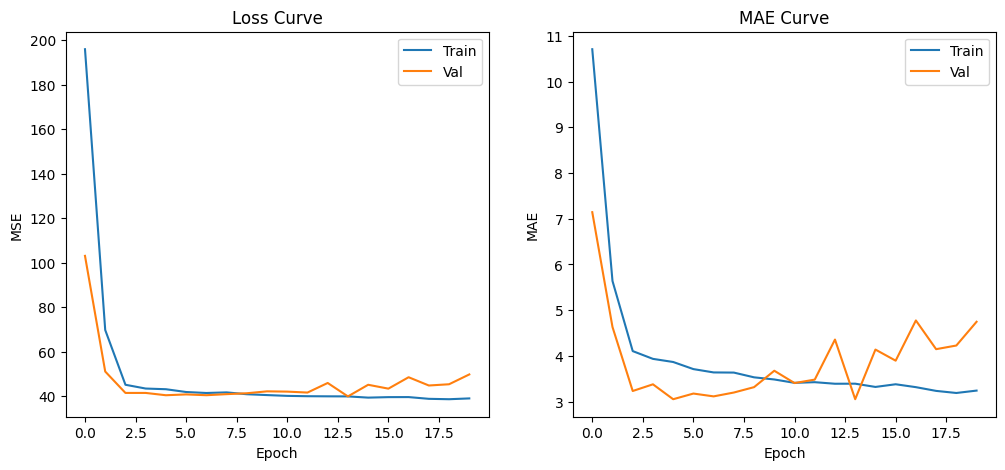

In [5]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend(["Train", "Val"])

plt.subplot(1,2,2)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title("MAE Curve")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend(["Train", "Val"])

plt.show()


Test With Random Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
True Coordinate : [47 23]
Predicted       : [33.39636  30.866041]


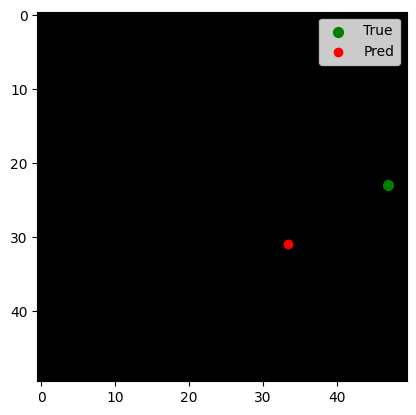

In [6]:
idx = np.random.randint(0, len(X_test))
sample = X_test[idx]
true_coord = y_test[idx]
pred_coord = cnn_model.predict(sample.reshape(1,50,50,1))[0]

print("True Coordinate :", true_coord)
print("Predicted       :", pred_coord)

plt.imshow(sample.reshape(50,50), cmap='gray')
plt.scatter(true_coord[0], true_coord[1], color='green', label="True", s=50)
plt.scatter(pred_coord[0], pred_coord[1], color='red', label="Pred")
plt.legend()
plt.show()


Evaluate Final Model Performance

In [7]:
test_loss, test_mae = cnn_model.evaluate(X_test, y_test)
print("Test MSE:", test_loss)
print("Test MAE:", test_mae)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 47.3360 - mae: 4.5844
Test MSE: 47.336036682128906
Test MAE: 4.584399700164795


Save Model

In [8]:
cnn_model.save("cnn_pixel_regression_model.h5")
print("Model Saved!")


Model Saved!
